In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image


In [156]:
image = cv2.cvtColor(cv2.imread('image_1.jpg'),cv2.COLOR_BGR2RGB)


In [113]:
image.shape

(673, 1200, 3)

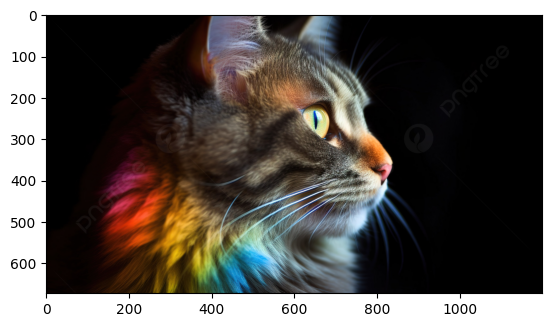

In [114]:
plt.imshow(image)

In [115]:
r, g, b = cv2.split(image)


In [116]:
r, g, b = r/255, g/255, b/2555

In [117]:
r

array([[0.02745098, 0.01176471, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01568627],
       ...,
       [0.04313725, 0.04313725, 0.04313725, ..., 0.        , 0.        ,
        0.        ],
       [0.04705882, 0.04705882, 0.04705882, ..., 0.        , 0.        ,
        0.02745098],
       [0.05490196, 0.04313725, 0.04705882, ..., 0.        , 0.00392157,
        0.01176471]])

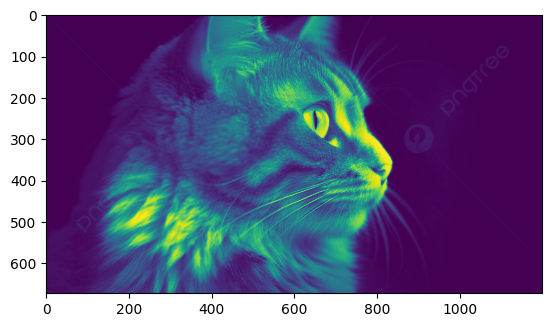

In [121]:
plt.imshow(r)

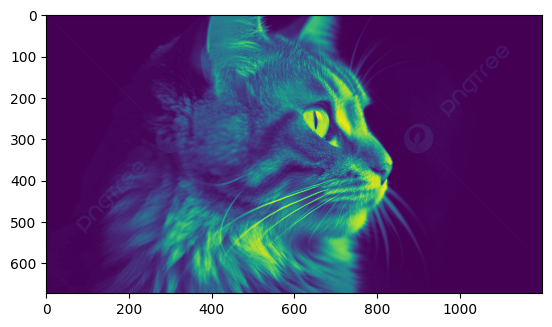

In [122]:
plt.imshow(g)

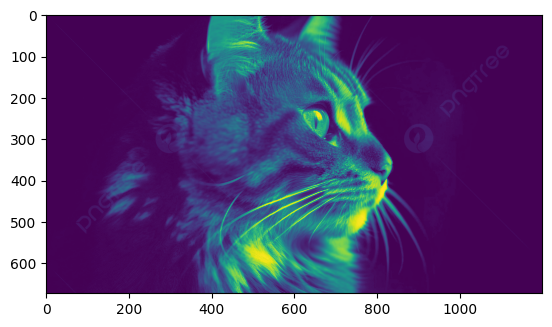

In [123]:
plt.imshow(b)

In [124]:
image.shape

(673, 1200, 3)

In [140]:
pca_comp = 20

pca_r = PCA(n_components=pca_comp)
reduce_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_comp)
reduce_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_comp)
reduce_b = pca_b.fit_transform(b)

In [141]:
print(reduce_r.shape)
print(reduce_g.shape)
print(reduce_b.shape)

(673, 20)
(673, 20)
(673, 20)


In [142]:
combine = np.array([reduce_r,reduce_g,reduce_b])

In [158]:
# combine.reshape(2657,50,3)

In [144]:
reconstruct_r = pca_r.inverse_transform(reduce_r)
reconstruct_g = pca_g.inverse_transform(reduce_g)
reconstruct_b = pca_b.inverse_transform(reduce_b)

In [145]:
reconstruct_r.shape

(673, 1200)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12492477331466417..1.2077783445562404].


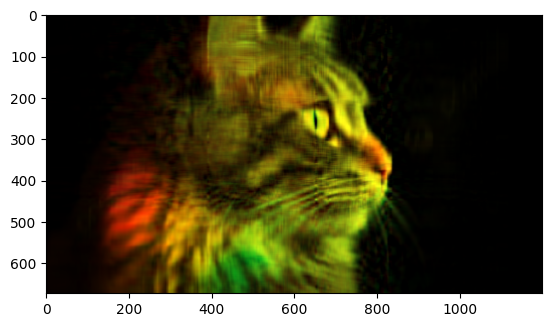

In [146]:
image_resconstructed = cv2.merge((reconstruct_r,reconstruct_g,reconstruct_b))
plt.imshow(image_resconstructed)

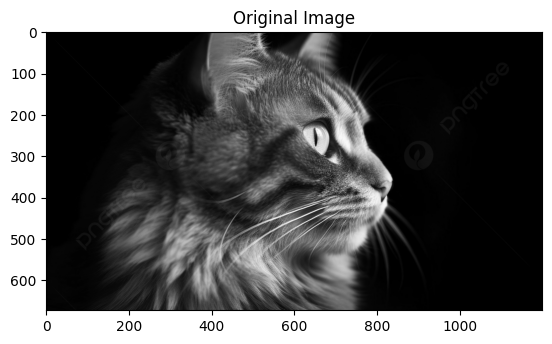

In [165]:
image = cv2.imread('image_1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image') 
plt.show()

In [166]:
# Step 2: Flatten the image
# Reshape the image into a 2D array where each row is a pixel and each column is a feature (intensity in this case)
flat_image = gray_image.flatten().reshape(-1, gray_image.shape[1])


In [167]:

# Step 3: Apply PCA
# Reduce the dimensionality using PCA
n_components = 50  
pca = PCA(n_components=n_components)
pca.fit(flat_image)
compressed_image = pca.transform(flat_image)

In [168]:

# Step 4: Reconstruct the image from the compressed data
reconstructed_image = pca.inverse_transform(compressed_image)
reconstructed_image = reconstructed_image.reshape(gray_image.shape)


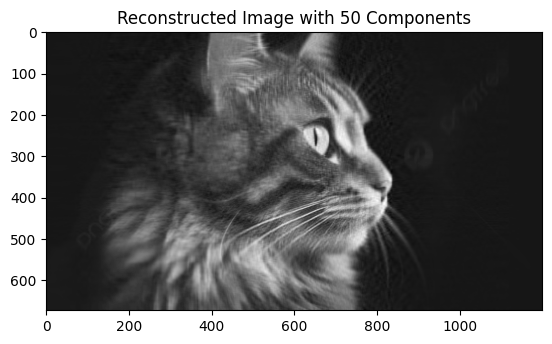

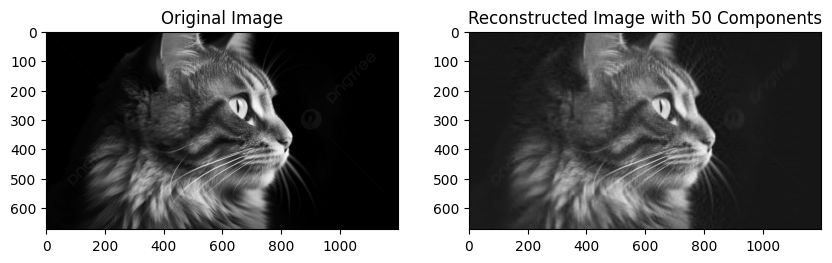

Compression Ratio: 0.04


In [170]:

# Step 5: Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f'Reconstructed Image with {n_components} Components')
plt.show()

# Step 6: Compare original and reconstructed images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title(f'Reconstructed Image with {n_components} Components')

plt.show()

# Step 7: Evaluate the compression
compression_ratio = n_components / flat_image.shape[1]
print(f'Compression Ratio: {compression_ratio:.2f}')
